FLANN based Matcher
https://docs.opencv.org/master/dc/dc3/tutorial_py_matcher.html

In [ ]:
!pip install opencv-python==3.4.2.16
!pip install opencv-contrib-python==3.4.2.16

     |████████████████████████████████| 25.0MB 171kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
     |████████████████████████████████| 30.6MB 147kB/s 
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [ ]:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)  

In [ ]:
FLANN_INDEX_LSH = 6
index_params= dict(algorithm = FLANN_INDEX_LSH,
                   table_number = 6, # 12
                   key_size = 12,     # 20
                   multi_probe_level = 1) #2

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [ ]:
img1 = cv.imread('s1.png',cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread('s2.png',cv.IMREAD_GRAYSCALE)          # trainImage

In [ ]:
# Initiate SIFT detector
sift = cv.xfeatures2d.SIFT_create()

In [ ]:
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

In [ ]:
# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary

In [ ]:
flann = cv.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)

In [ ]:
# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

In [ ]:
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]

In [ ]:
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv.DrawMatchesFlags_DEFAULT)

In [ ]:
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)

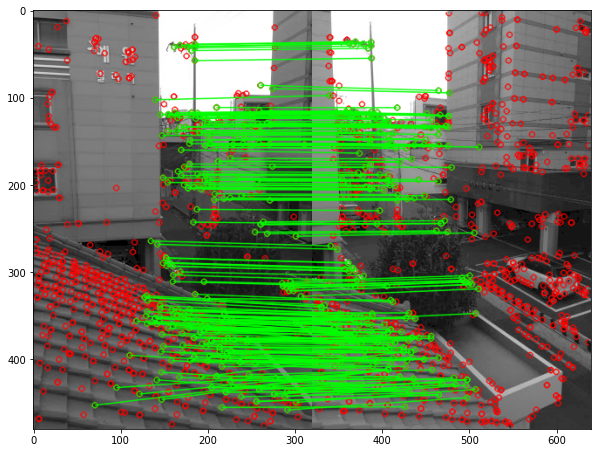

(<matplotlib.image.AxesImage at 0x7fd1840e3e80>, None)

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(img3,),plt.show()